<a href="https://colab.research.google.com/github/hvyrain/bigprobasic/blob/main/2022%EC%88%98%EC%8B%9C1%EC%B0%A8%EA%B2%BD%EC%9F%81%EB%A5%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 글꼴 설정

In [35]:
# 다운로드 가능한 무료 한글 글꼴 딕셔너리
font_list = {'구글고딕체' : 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip',
             '구글명조체' : 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKkr-hinted.zip',
              '나눔고딕' : 'https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_GOTHIC.zip',
             '나눔명조' : 'https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_MYUNGJO.zip',
             '나눔바른고딕' : 'https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_BARUNGOTHIC.zip',
             '나눔스퀘어' : 'https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_SQUARE.zip',
             '나눔스퀘어라운드' : 'https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_SQUARE_ROUND.zip',
             '나눔바른펜' : 'https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_BARUNPEN.zip',
             '나눔펜' : 'https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_SONGEULSSI.zip'
}

In [36]:
#@title 글꼴 선택 { run: "auto", form-width: "300px" }
# 오른쪽에서 설치할 글꼴을 선택
font_name = "\uB098\uB214\uBA85\uC870" #@param ["\uB098\uB214\uACE0\uB515", "\uB098\uB214\uBA85\uC870", "\uB098\uB214\uBC14\uB978\uACE0\uB515", "\uB098\uB214\uC2A4\uD018\uC5B4", "\uB098\uB214\uC2A4\uD018\uC5B4\uB77C\uC6B4\uB4DC", "\uB098\uB214\uBC14\uB978\uD39C", "\uB098\uB214\uD39C", "\uAD6C\uAE00\uACE0\uB515\uCCB4", "\uAD6C\uAE00\uBA85\uC870\uCCB4"]
font_path = font_list[font_name]
font_path

'https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_MYUNGJO.zip'

In [37]:
'''
폰트 다운로드 및 압축 풀기
반드시 런타임 재시작 필요
'''
import os
# 글꼴 다운로드
path = font_path      # 위 셀에서 선택한 글꼴 URL 
cmd = 'wget ' + path
os.system(cmd)
# 압축 풀기
cmd = 'unzip ' + cmd[cmd.rfind('/')+1:] + ' -d /usr/share/fonts/truetype'
os.system(cmd)
# 나머지 작업, 반드시 런타임 다시 시작, kaggle : run - restart 메뉴 선택
!sudo fc-cache -fv          # kaggle.com에서는 sudo를 제거한다.
!rm ~/.cache/matplotlib -rf # 실행 후 런타임 다시 시작 필요

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 3 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
# 아래 명령을 실행하여 사용할 글꼴 파일명을 복사한 후 아래 셀의 ttf_path 글꼴 파일명을 변경해 준다.
!ls /usr/share/fonts/truetype

humor-sans  NanumMyeongjoBold.ttf	NanumMyeongjo.ttf
liberation  NanumMyeongjoExtraBold.ttf


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
# + 뒤의 글꼴 파일명을 위 셀에서 복사한 내용으로 붙여 넣기 
ttf_path = '/usr/share/fonts/truetype/' + 'NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=ttf_path).get_name()
plt.rc('font', family=font_name, size=15)
plt.rcParams['axes.unicode_minus'] = False
# FontProperties는 글꼴 종류, 크기 등 글꼴을 개별적으로 지정할 때 사용한다. 함수 내에서 적절한 속성에 지정
fontprop = fm.FontProperties(fname=ttf_path, size= 36)
print(font_name)

NanumMyeongjo


# 경쟁률 데이터 처리 - UWAY

In [3]:
import pandas as pd

In [10]:
# uwayapply로부터 HTML 파일을 읽어 와서 df 변수에 저장한다.
df = pd.read_html('http://ratio.uwayapply.com/Sl5KTCZiSmZDQ2FMSmZmVGY=', na_values='-')[0]
df.fillna(0, inplace=True)
df

학부            모집단위 일반고전형       ...     농어촌전형 기초수급/차상위계층               
         학부            모집단위  모집인원 지원인원  ...       경쟁률       모집인원 지원인원       경쟁률
0   게임웹툰디자인     컴퓨터게임과(3년제)  28.0  0.0  ...  0.00 : 1        2.0  0.0  0.00 : 1
1   게임웹툰디자인      웹툰만화과(3년제)  12.0  0.0  ...  0.00 : 1        3.0  0.0  0.00 : 1
2   게임웹툰디자인          시각디자인과  18.0  3.0  ...         0        1.0  0.0  0.00 : 1
3   게임웹툰디자인  토이캐릭터디자인과(3년제)  18.0  0.0  ...         0        1.0  0.0  0.00 : 1
4   게임웹툰디자인        실내건축디자인과  18.0  1.0  ...         0        1.0  0.0  0.00 : 1
5   게임웹툰디자인        리빙제품디자인과  17.0  0.0  ...         0        1.0  0.0  0.00 : 1
6      방송예술    방송영화제작과(3년제)  25.0  4.0  ...         0        2.0  0.0  0.00 : 1
7      방송예술    스타일리스트과(3년제)  14.0  2.0  ...         0        1.0  0.0  0.00 : 1
8    항공호텔관광           호텔관광과  40.0  2.0  ...  0.00 : 1        1.0  0.0  0.00 : 1
9    항공호텔관광         호텔제과제빵과  30.0  2.0  ...  0.00 : 1        3.0  1.0  0.33 : 1
10    사회서비스           경찰행정과  43.0  2.0  ...  0.00 : 1        2.0  0.0  0.00 : 1
11    사회서비스      유아교육과(3년제)  44.0  4.0  ...  1.00 : 1        2.0  0.0  0.00 : 1
12    사회서비스    빅데이터경영과(3년제)  20.0  0.0  ...         0        1.0  0.0  0.00 : 1
13    사회서비스         회계자산관리과  20.0  0.0  ...         0        1.0  0.0  0.00 : 1
14    사회서비스         스포츠지도자과  20.0  3.0  ...  0.00 : 1        2.0  0.0  0.00 : 1
15    사회서비스           반려동물과  20.0  2.0  ...  0.00 : 1        3.0  0.0  0.00 : 1
16     보건복지       간호학과(4년제)  17.0  6.0  ...  0.00 : 1        8.0  0.0  0.00 : 1
17     보건복지         보건의료정보과  23.0  3.0  ...         0        1.0  0.0  0.00 : 1
18     보건복지      사회복지과(3년제)  23.0  4.0  ...  0.00 : 1        3.0  0.0  0.00 : 1
19     보건복지           뷰티케어과  54.0  6.0  ...  0.00 : 1        3.0  1.0  0.33 : 1
20    스마트과학        반도체클러스터과  18.0  2.0  ...         0        1.0  0.0  0.00 : 1
21    스마트과학             전기과  17.0  0.0  ...         0        1.0  0.0  0.00 : 1
22    스마트과학         건축소방설비과  42.0  2.0  ...         0        1.0  0.0  0.00 : 1
23    스마트과학            자동차과  23.0  1.0  ...  0.00 : 1        1.0  0.0  0.00 : 1
24    스마트과학           드론기계과  16.0  1.0  ...         0        1.0  1.0  1.00 : 1
25   항공호텔관광          항공서비스과   0.0  0.0  ...         0        0.0  0.0         0
26     방송예술      연기예술과(3년제)   0.0  0.0  ...         0        0.0  0.0         0
27     방송예술    실용음악보컬과(3년제)   0.0  0.0  ...         0        0.0  0.0         0

[28 rows x 20 columns]

In [30]:
# 원본 데이터를 df1으로 복사한 후 열이름을 변경한다.
df1 = df.copy()
df1.columns = ['학부','학과','일반모집','일반지원','일반경쟁률','특성모집','특성지원','특성경쟁률','면접모집','면접지원','면접경쟁률','실기모집','실기지원','실기경쟁률','농어촌모집','농어촌지원','농어촌경쟁률','기초모집','기초지원','기초경쟁률']
df1 = df1.set_index('학과')
def calc_rate(x, y) :
  return 0 if y==0 else x / y

# 모집별 경쟁률 다시 계산
df1['일반경쟁률'] = df1['일반지원'] / df1['일반모집']
df1['특성경쟁률'] = df1['특성지원'] / df1['특성모집']
df1['면접경쟁률'] = df1['면접지원'] / df1['면접모집']
df1['실기경쟁률'] = df1['실기지원'] / df1['실기모집']
df1['농어촌경쟁률'] = df1['농어촌지원'] / df1['농어촌모집']
df1['기초경쟁률'] = df1['기초지원'] / df1['기초모집']
# 일반 + 특성화 경쟁률
df1['일반+특성화지원'] = df1['일반지원']+df1['특성지원']
df1['일반+특성화모집'] = df1['일반모집']+df1['특성모집']
df1['일반+특성화경쟁률'] = df1['일반+특성화지원'] / df1['일반+특성화모집']

df1['전체지원'] = df1['일반지원']+df1['특성지원']+df1['면접지원']+df1['실기지원']+df1['농어촌지원']+df1['기초지원']
df1['전체모집'] = df1['일반모집']+df1['특성모집']+df1['면접모집']+df1['실기모집']+df1['농어촌모집']+df1['기초모집']
df1['전체경쟁률'] = df1['전체지원'] / df1['전체모집']

In [35]:
df1 #[['일반모집','일반지원','일반경쟁률','특성모집','특성지원','특성경쟁률','일반+특성화지원','일반+특성화모집','일반+특성화경쟁률','전체지원','전체모집','전체경쟁률']]

,학부,일반모집,일반지원,일반경쟁률,특성모집,특성지원,특성경쟁률,면접모집,면접지원,면접경쟁률,실기모집,실기지원,실기경쟁률,농어촌모집,농어촌지원,농어촌경쟁률,기초모집,기초지원,기초경쟁률,일반+특성화지원,일반+특성화모집,일반+특성화경쟁률,전체지원,전체모집,전체경쟁률
학과,,,,,,,,,,,,,,,,,,,,,,,,,
컴퓨터게임과(3년제),게임웹툰디자인,28.0,0.0,0.000000,14.0,2.0,0.142857,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.0,2.0,0.0,0.000000,2.0,42.0,0.047619,2.0,45.0,0.044444
웹툰만화과(3년제),게임웹툰디자인,12.0,0.0,0.000000,5.0,1.0,0.200000,0.0,0.0,NaN,24.0,1.0,0.041667,2.0,0.0,0.0,3.0,0.0,0.000000,1.0,17.0,0.058824,2.0,46.0,0.043478
시각디자인과,게임웹툰디자인,18.0,3.0,0.166667,12.0,1.0,0.083333,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.000000,4.0,30.0,0.133333,4.0,31.0,0.129032
토이캐릭터디자인과(3년제),게임웹툰디자인,18.0,0.0,0.000000,6.0,0.0,0.000000,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.000000,0.0,24.0,0.000000,0.0,25.0,0.000000
실내건축디자인과,게임웹툰디자인,18.0,1.0,0.055556,8.0,2.0,0.250000,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.000000,3.0,26.0,0.115385,3.0,27.0,0.111111
리빙제품디자인과,게임웹툰디자인,17.0,0.0,0.000000,7.0,1.0,0.142857,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.000000,1.0,24.0,0.041667,1.0,25.0,0.040000
방송영화제작과(3년제),방송예술,25.0,4.0,0.160000,9.0,1.0,0.111111,10.0,1.0,0.100000,0.0,0.0,NaN,0.0,0.0,NaN,2.0,0.0,0.000000,5.0,34.0,0.147059,6.0,46.0,0.130435
스타일리스트과(3년제),방송예술,14.0,2.0,0.142857,6.0,1.0,0.166667,12.0,2.0,0.166667,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.000000,3.0,20.0,0.150000,5.0,33.0,0.151515
호텔관광과,항공호텔관광,40.0,2.0,0.050000,16.0,0.0,0.000000,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0.000000,2.0,56.0,0.035714,2.0,58.0,0.034483


In [41]:
# 지원자 수가 평균 - 표준편차 미만인 학과
df1[df1['전체지원'] < df1['전체지원'].mean() - df1['전체지원'].std(ddof=0)]

,학부,일반모집,일반지원,일반경쟁률,특성모집,특성지원,특성경쟁률,면접모집,면접지원,면접경쟁률,실기모집,실기지원,실기경쟁률,농어촌모집,농어촌지원,농어촌경쟁률,기초모집,기초지원,기초경쟁률,일반+특성화지원,일반+특성화모집,일반+특성화경쟁률,전체지원,전체모집,전체경쟁률
학과,,,,,,,,,,,,,,,,,,,,,,,,,
토이캐릭터디자인과(3년제),게임웹툰디자인,18.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,24.0,0.0,0.0,25.0,0.0
빅데이터경영과(3년제),사회서비스,20.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,28.0,0.0,0.0,29.0,0.0
회계자산관리과,사회서비스,20.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,32.0,0.0,0.0,33.0,0.0
연기예술과(3년제),방송예술,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,18.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,18.0,0.0
실용음악보컬과(3년제),방송예술,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,18.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,18.0,0.0


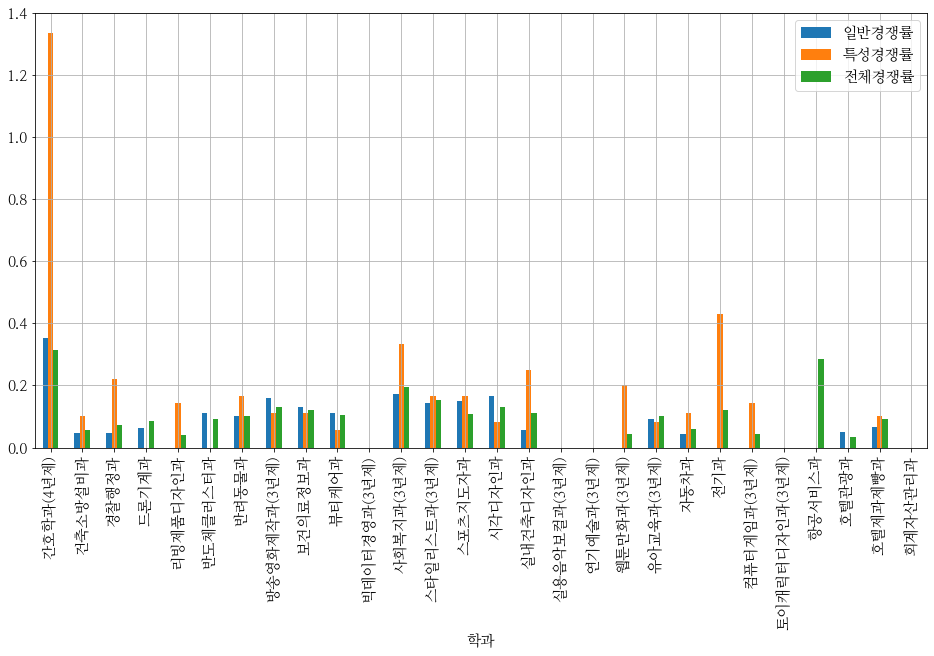

In [45]:
# 학과별로 정렬한 경쟁률
df2 = df1.sort_index()
df2[['일반경쟁률', '특성경쟁률','전체경쟁률']].plot.bar(figsize=(16,8), grid=True)

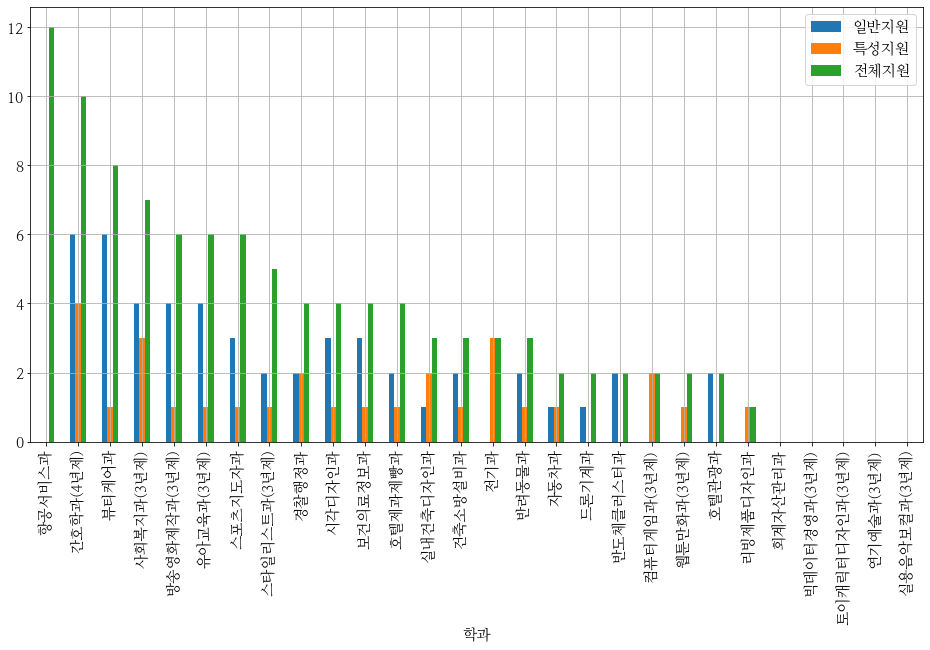

In [46]:
# 지원자 수로 정렬하여 출력
df3 = df1.sort_values(by='전체지원', ascending=False)
df3[['일반지원', '특성지원','전체지원']].plot.bar(figsize=(16,8), grid=True)